# <b> Heart Disease UCI - Dataset from Kaggle

### <b> Machine Learning - Binary Classification for predict presence of heart disease in the patient

Features information:
    
    
* age: age in years
* sex: (1 = male; 0 = female)
* cp: chest pain type
* trestbpsresting: blood pressure (in mm Hg on admission to the hospital)
* cholserum: cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl): (1 = true; 0 = false)
* restecg: resting: electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina: (1 = yes; 0 = no)
* oldpeakST: depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Target information:
    
* target: 1 or 0

### <b> Imports

In [386]:
# Visualization and Manipulation
import pandas as pd
import numpy as np
import seaborn as sea
sea.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report    
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# Custom colors
myColor = ['']

###  <b> Loading data

In [387]:
# Read csv file
data = pd.read_csv('dataset/heart.csv')

###  <b> Informations about the data

In [388]:
# First lines 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [389]:
# Informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [390]:
# Statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [391]:
# Data types
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [392]:
data.shape

(303, 14)

## <b> Exploratory Data Analysis

### <b> Searching for missing values

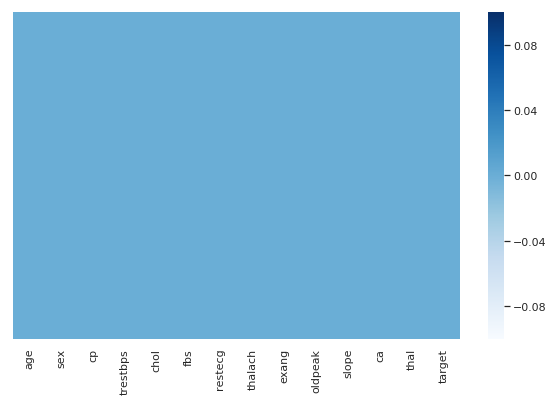

In [393]:
# Visualizing the missing data 
plt.figure(figsize = (10,6))
sea.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Blues')

<b> Solid color = no missing values

### <b> Ages Distribution

Text(0, 0.5, 'Count')

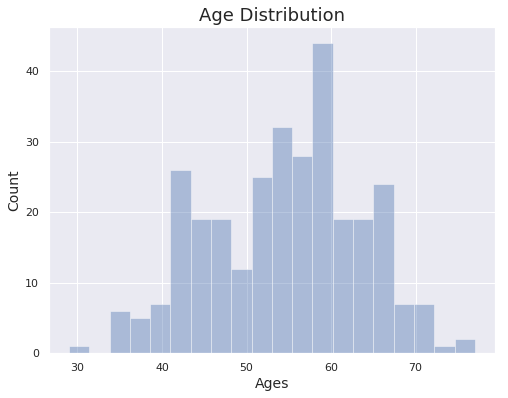

In [394]:
# Plot ages
plt.figure(figsize=(8,6))
fig = sea.distplot(data['age'], bins=20, kde=False, color = 'b')
fig.set_title('Age Distribution', fontsize=18)
fig.set_xlabel('Ages', fontsize=14)
fig.set_ylabel('Count', fontsize=14)

### <b>Sex Count

Text(0, 0.5, 'Count')

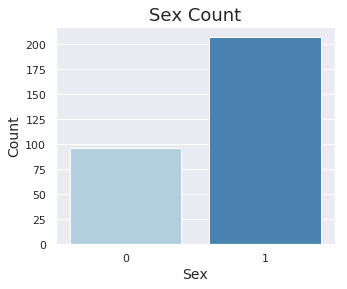

In [395]:
# Plot sex
plt.figure(figsize=(5,4))
fig = sea.countplot(data['sex'], palette='Blues')
fig.set_title('Sex Count', fontsize=18)
fig.set_xlabel('Sex', fontsize=14)
fig.set_ylabel('Count', fontsize=14)

0 represents female

1 represents male

### <b>Fast Blood Sugar

Text(0, 0.5, 'Count')

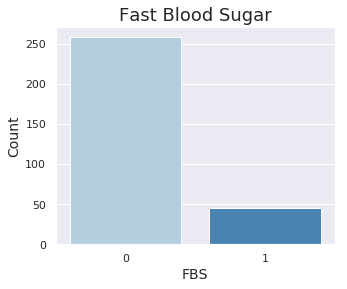

In [396]:
# Plot fbs
plt.figure(figsize=(5,4))
fig = sea.countplot(data['fbs'], palette='Blues')
fig.set_title('Fast Blood Sugar', fontsize=18)
fig.set_xlabel('FBS', fontsize=14)
fig.set_ylabel('Count', fontsize=14)

0 < 120 mg/L

1 >= 120 mg/L

### <b> Exercise Induced Angina

Text(0, 0.5, 'Count')

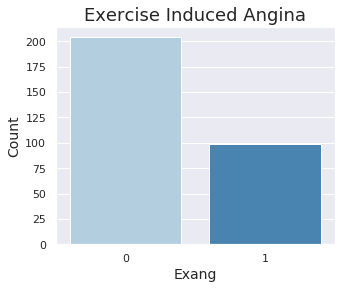

In [397]:
# Plot fbs
plt.figure(figsize=(5,4))
fig = sea.countplot(data['exang'], palette='Blues')
fig.set_title('Exercise Induced Angina', fontsize=18)
fig.set_xlabel('Exang', fontsize=14)
fig.set_ylabel('Count', fontsize=14)

0 represents NO history of Diabetes

1 represents YES history of Diabetes

### <b>Chest Pain Type

In [398]:
# Organizing data in a dataframe
cp = data['cp'].value_counts()
df_cp = pd.DataFrame()
df_cp['Chest Pain Type'] = cp.index
df_cp['Count'] = cp.values
df_cp

,Chest Pain Type,Count
0,0,143
1,2,87
2,1,50
3,3,23


Text(0, 0.5, 'Count')

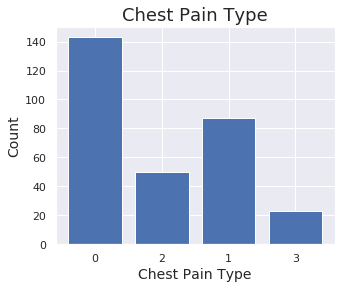

In [399]:
# Visualizing this dataframe in a barplot
plt.figure(figsize=(5,4))
fig = plt.bar(x = 'Chest Pain Type', height = 'Count', data = df_cp, tick_label=[0, 1, 2, 3], color='b')
plt.title('Chest Pain Type', fontsize=18)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

 Value 0: typical angina
 
 Value 1: atypical angina
 
 Value 2: non-anginal pain
 
 Value 3: asymptomatic

### <b> Number Major of Vessels

In [400]:
# Organizing data in a dataframe
ca = data['ca'].value_counts()
df_ca = pd.DataFrame()
df_ca['Number Major of Vessels'] = ca.index
df_ca['Count'] = ca.values
df_ca

,Number Major of Vessels,Count
0,0,175
1,1,65
2,2,38
3,3,20
4,4,5


Text(0, 0.5, 'Count')

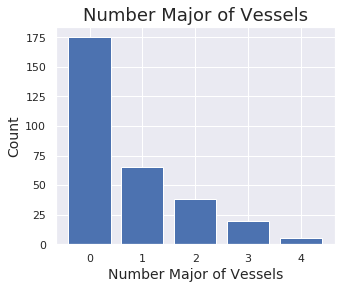

In [401]:
# Visualizing this dataframe in a barplot
plt.figure(figsize=(5,4))
fig = plt.bar(x = 'Number Major of Vessels', height = 'Count', data = df_ca, tick_label=[0, 1, 2, 3, 4], color='b')
plt.title('Number Major of Vessels', fontsize=18)
plt.xlabel('Number Major of Vessels', fontsize=14)
plt.ylabel('Count', fontsize=14)

### <b> Thal

In [402]:
# Organizing data in a dataframe
thal = data['thal'].value_counts()
df_thal = pd.DataFrame()
df_thal['Thal'] = thal.index
df_thal['Count'] = thal.values
df_thal

,Thal,Count
0,2,166
1,3,117
2,1,18
3,0,2


Text(0, 0.5, 'Count')

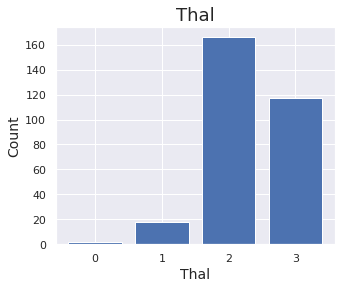

In [403]:
# Visualizing this dataframe in a barplot
plt.figure(figsize=(5,4))
fig = plt.bar(x = 'Thal', height = 'Count', data = df_thal, tick_label=[2, 3, 1, 0], color='b')
plt.title('Thal', fontsize=18)
plt.xlabel('Thal', fontsize=14)
plt.ylabel('Count', fontsize=14)

### <b> Cholesterol

Text(0, 0.5, 'Count')

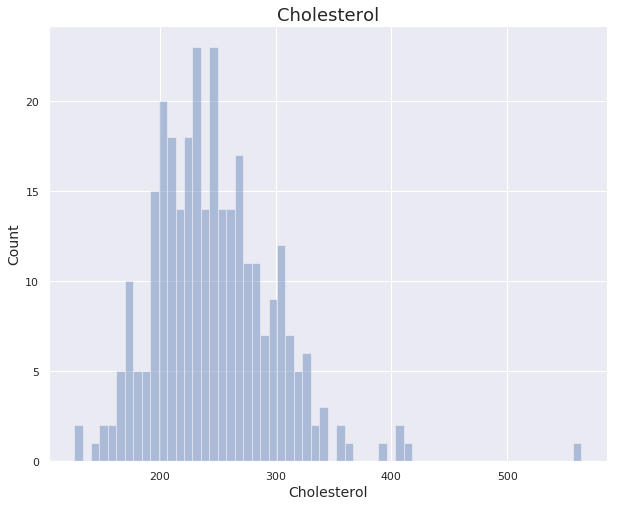

In [404]:
# Plot blood
plt.figure(figsize=(10,8))
fig = sea.distplot(data['chol'], bins=60, kde=False, color='b')
fig.set_title('Cholesterol', fontsize=18)
fig.set_xlabel('Cholesterol', fontsize=14)
fig.set_ylabel('Count', fontsize=14)

### <b> ECG Resting

In [405]:
# Organizing data in a dataframe
ecg = data['restecg'].value_counts()
df_ecg = pd.DataFrame()
df_ecg['RestECG'] = ecg.index
df_ecg['Count'] = ecg.values
df_ecg

,RestECG,Count
0,1,152
1,0,147
2,2,4


Text(0, 0.5, 'Count')

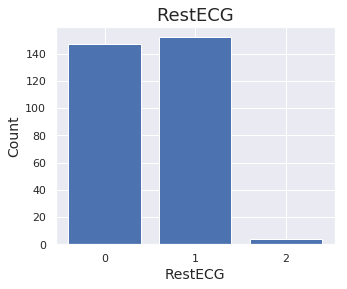

In [406]:
# Visualizing this dataframe in a barplot
plt.figure(figsize=(5,4))
fig = plt.bar(x = 'RestECG', height = 'Count', data = df_ecg, tick_label=[1,0,2], color='b')
plt.title('RestECG', fontsize=18)
plt.xlabel('RestECG', fontsize=14)
plt.ylabel('Count', fontsize=14)

### <b>Slope

In [407]:
# Organizing data in a dataframe
slope = data['slope'].value_counts()
df_slope = pd.DataFrame()
df_slope['Slope'] = slope.index
df_slope['Count'] = slope.values
df_slope

,Slope,Count
0,2,142
1,1,140
2,0,21


Text(0, 0.5, 'Count')

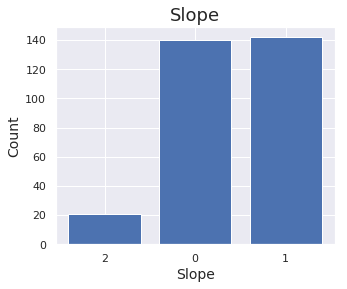

In [408]:
# Visualizing this dataframe in a barplot
plt.figure(figsize=(5,4))
fig = plt.bar(x = 'Slope', height = 'Count', data = df_slope, tick_label=[1,0,2], color='b')
plt.title('Slope', fontsize=18)
plt.xlabel('Slope', fontsize=14)
plt.ylabel('Count', fontsize=14)

### <b>Data Correlation

In [409]:
# Organizing the data with continous behaviour to see the relation between them
continuous_data = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak',]
data_new = data[continuous_data]
data_new.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


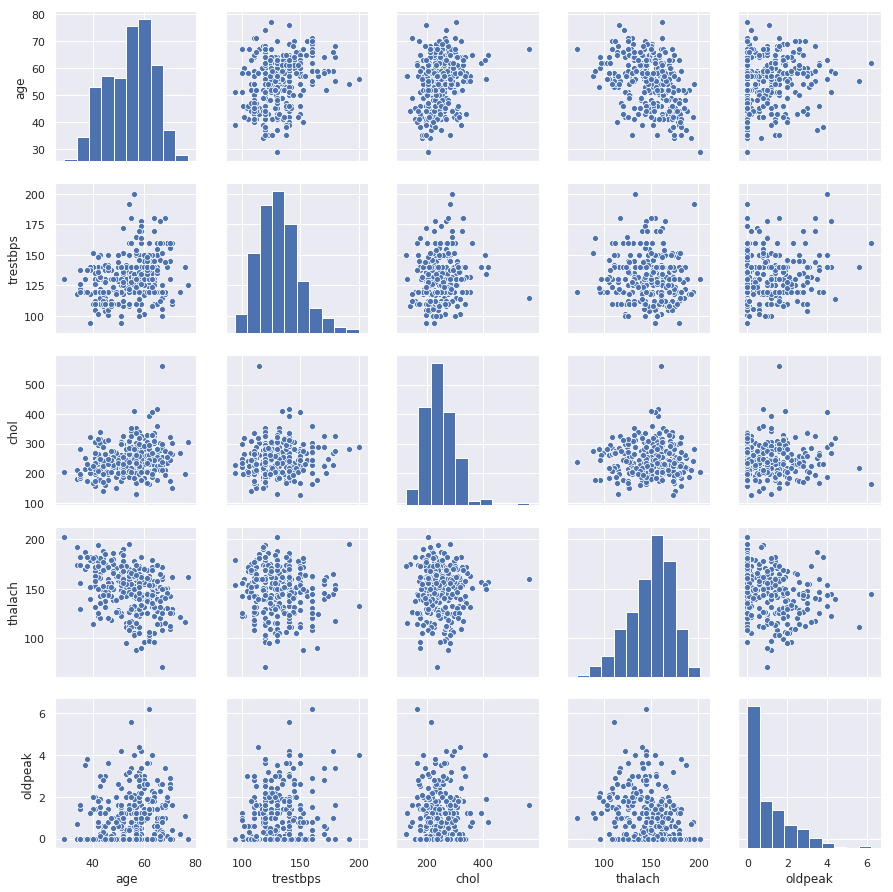

In [410]:
# Pairplot of the continous variables
sea.pairplot(data_new)

In [411]:
# Visualizing the correlation between features and target
corr = data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


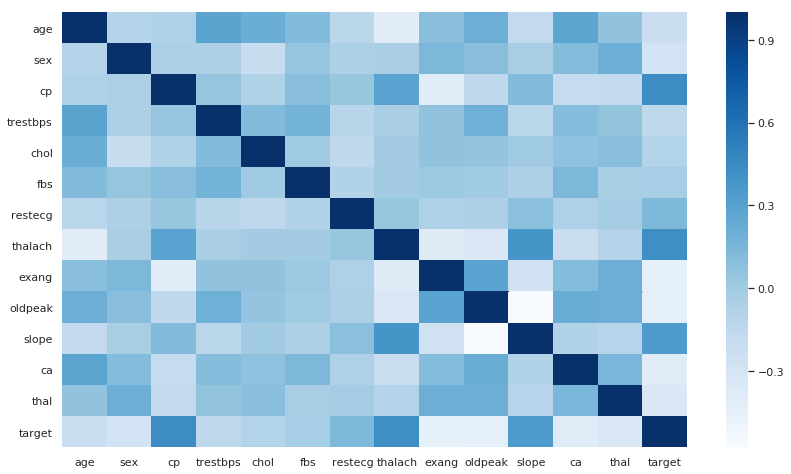

In [412]:
# Visualizing on a heatmap
plt.figure(figsize = (14,8))
sea.heatmap(corr,yticklabels=True,cbar=True,cmap='Blues')

In [413]:
# Visualizing the 13 first correlations 
correlation = corr['target'].sort_values(ascending=False)[:13]
correlation

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
Name: target, dtype: float64

### <b> Visualizing and organizing the correlated data

In [414]:
# Split the dataframe in correlated features
corr_names = ['cp', 'thalach', 'slope', 'restecg', 'trestbps', 'fbs', 'chol', 'age',
             'sex', 'thal', 'ca', 'oldpeak', 'exang']
corr_data = data[corr_names]

# Normalizing the corr_data dataframe
data_norm = (corr_data - corr_data.mean() )/ (corr_data.std())
data_norm.head()

,cp,thalach,slope,restecg,trestbps,fbs,chol,age,sex,thal,ca,oldpeak,exang
0,1.969864,0.015417,-2.270822,-1.004171,0.762694,2.390484,-0.255910,0.950624,0.679881,-2.145324,-0.713249,1.085542,-0.69548
1,1.000921,1.630774,-2.270822,0.897478,-0.092585,-0.416945,0.072080,-1.912150,0.679881,-0.512075,-0.713249,2.119067,-0.69548
2,0.031978,0.975900,0.974740,-1.004171,-0.092585,-0.416945,-0.815424,-1.471723,-1.465992,-0.512075,-0.713249,0.310399,-0.69548
3,0.031978,1.237849,0.974740,0.897478,-0.662770,-0.416945,-0.198030,0.179877,0.679881,-0.512075,-0.713249,-0.206364,-0.69548
4,-0.936965,0.582975,0.974740,0.897478,-0.662770,-0.416945,2.078611,0.289984,-1.465992,-0.512075,-0.713249,-0.378618,1.43311


### <b> Organizing data to train the model

In [415]:
# Target variable
y = data['target']

In [416]:
# Features
X = data_norm

## <b> Train the Model with Logistic Regression

In [417]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [418]:
# Defining the Model
logReg = LogisticRegression(solver='liblinear')

In [419]:
# Fitting the data
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [420]:
# Predicting
predict = logReg.predict(X_test)

In [421]:
# Report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

   micro avg       0.86      0.86      0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [422]:
# Accuracy
print(logReg.score(X, y))

0.8547854785478548


In [423]:
# Confusion Matrix
cm = confusion_matrix(y_test, predict)
print(cm)

[[35  9]
 [ 4 43]]


Text(0.5, 1.0, 'Predicting Heart Disease')

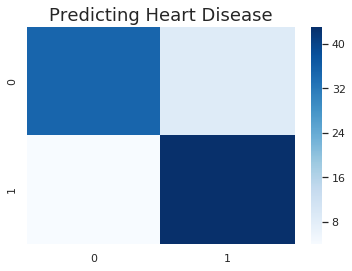

In [424]:
sea.heatmap(cm, cmap = 'Blues')
plt.title('Predicting Heart Disease', fontsize=18)

<Figure size 432x288 with 0 Axes>

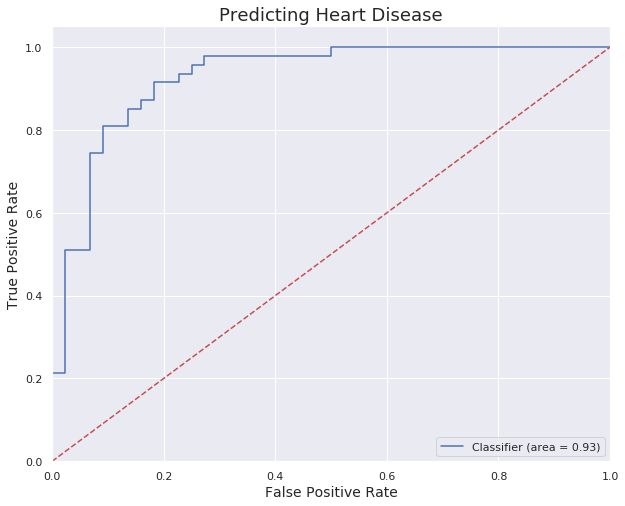

In [425]:
# ROC AUC Curve
auc_dt_churn = roc_auc_score(y_test, logReg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])
plt.figure()
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % auc_dt_churn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Predicting Heart Disease', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right")
plt.show()